<a href="https://colab.research.google.com/github/ThuanPhat2709/BT-AI/blob/main/FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACE** ID

## Import Library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,MaxPooling2D,Conv2D
from keras.backend import conv2d
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import cv2
import os
import tensorflow as  tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

## Data Processing

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
valid=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') ## liên kết vào gg drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/FACE/train',target_size = (150,150),batch_size = 32,class_mode = 'categorical')
validation_set=train.flow_from_directory('/content/drive/MyDrive/FACE/test',target_size = (150,150),batch_size =32,class_mode = 'categorical')      

Found 149 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


## Create Model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same",input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 150, 150, 16)      448       
                                                                 
 conv2d_137 (Conv2D)         (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 75, 75, 16)        0         
                                                                 
 conv2d_138 (Conv2D)         (None, 75, 75, 32)        4640      
                                                                 
 conv2d_139 (Conv2D)         (None, 75, 75, 32)        9248      
                                                     

In [ ]:
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_set,epochs=20, batch_size=16,validation_data=(validation_set),verbose=1)

Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 1.5816 - accuracy: 0.5705 - val_loss: 0.6389 - val_accuracy: 0.6111
Epoch 2/20
5/5 [==============================] - 5s 937ms/step - loss: 1.0983 - accuracy: 0.5906 - val_loss: 0.7237 - val_accuracy: 0.6944
Epoch 3/20
5/5 [==============================] - 4s 907ms/step - loss: 0.5931 - accuracy: 0.6980 - val_loss: 0.7016 - val_accuracy: 0.4167
Epoch 4/20
5/5 [==============================] - 4s 895ms/step - loss: 0.5926 - accuracy: 0.6980 - val_loss: 0.6124 - val_accuracy: 0.6944
Epoch 5/20
5/5 [==============================] - 4s 901ms/step - loss: 0.5462 - accuracy: 0.6913 - val_loss: 0.5770 - val_accuracy: 0.7222
Epoch 6/20
5/5 [==============================] - 4s 916ms/step - loss: 0.5211 - accuracy: 0.8054 - val_loss: 0.5634 - val_accuracy: 0.8333
Epoch 7/20
5/5 [==============================] - 4s 914ms/step - loss: 0.4228 - accuracy: 0.8591 - val_loss: 0.4987 - val_accuracy: 0.7500
Epoch 8/20
5/5 [=======

## Create Label

In [ ]:
train_set.class_indices

{'Người Khác': 0, 'Phát': 1}

In [ ]:
Names = {0: 'Người Khác',
 1: 'Phát'}

## Test Model

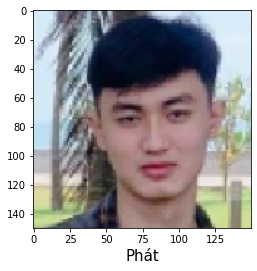

In [ ]:
img=load_img('sss.PNG',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,axis=0)
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

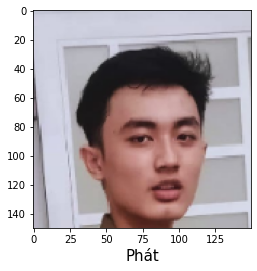

In [ ]:
img=load_img('22.PNG',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,axis=0)
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

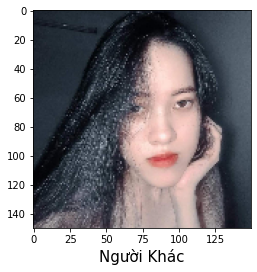

In [ ]:
img=load_img('bb.jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,axis=0)
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

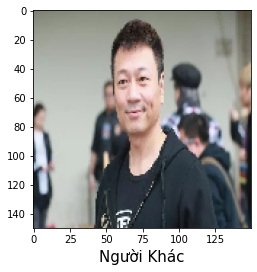

In [ ]:
img=load_img('gg.png',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=np.expand_dims(img,axis=0)
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

## Accuracy

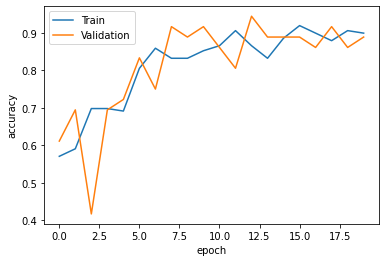

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(validation_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

2/2 [==============================] - 1s 91ms/step - loss: 0.3762 - accuracy: 0.9167
Sai số:  0.37615469098091125
Độ chính xác:  0.9166666865348816


## Save Model

In [ ]:
model.save('FaceID.h5')#lưu mô hình
from tensorflow.keras.models import load_model
model1=load_model('FaceID.h5')